# Illustration of Random Fourier Features for Kernel Approximation

Rahimi and Recht have shown that random Fourier features can be used to approximate kernel functions. Based on the representer theorem by Schoelkopf et al. (2001), the minimizer of a regularized energy minimization problem over a reproducing kernel hilbert space can be written as a linear combination of kernel functions. In their paper on random features for large scale kernel machines (2007), the authors have shown how the kernel function could be approximated using random features, reducing the problem's dimensions from $\mathbb{R}^N$, where $N$ the size of the data set, to $\mathbb{R}^R$, where $R \ll N$.

By the representer theorem and the kernel trick we get the following equalities, where $k(x,x_n) \in \mathbf{K}_N \in \mathbb{R}^{N \times N}$
$$
f^{\ast}(x)= \sum^N_{n=1} \alpha_n ​k(x,x_n​)= \langle \omega, \phi(x) \rangle_{\mathcal{H}}​.
$$




In general, this results tackles the problem of kernel methods for big data, i.e. very large $N$.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons, make_s_curve, make_circles, make_blobs
from sklearn.metrics.pairwise import rbf_kernel

### Generate Data

In [3]:
N_dataset = int(1E3)

dataset size: (1000, 2)


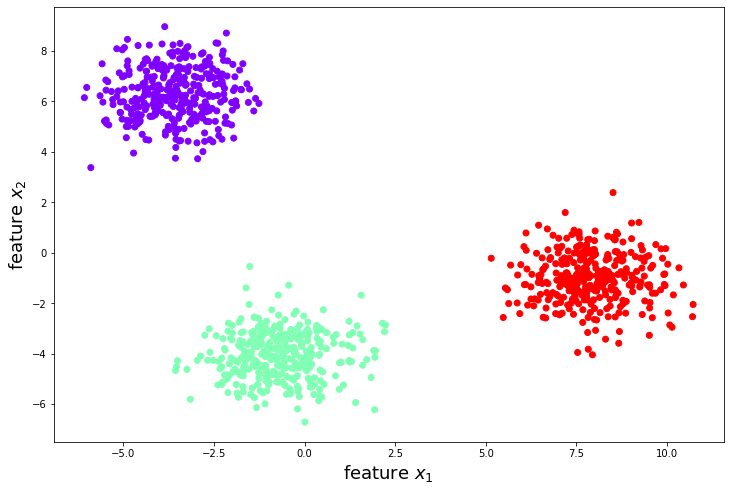

In [11]:
X, y = make_blobs(n_samples=1000, shuffle=True)
print(f"dataset size: {X.shape}")

plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.rainbow)

# plt.title("Blobs Dataset incl. Color Coding of Classes", fontsize=24)
plt.xlabel("feature $x_1$", fontsize=18)
plt.ylabel("feature $x_2$", fontsize=18)

# save plot for use in thesis
plt.savefig("./outputs/blobs_data.png", transparent=True, bbox_inches="tight")

plt.show()

### Approximation of Gaussian Kernel



In [12]:
# sort data for plotting
X = X[y.argsort()]

In [13]:
# compute Gaussian kernel with gamma = 1 / (2 sigma^2)
# that is, computing the projection in the feature space 
K = rbf_kernel(X, gamma=1/2.)

In [14]:
# set dim of samples
d = X.shape[1]

# compute random features for kernel approximation
approx_feature_space = {}

for r in [10, 50, 100, 200, 500, 800, 1000]:
    omega = np.random.normal(loc=0, scale=1, size=(r, d))
    bias = np.random.uniform(0, 2*np.pi, size=r)
    bias = np.repeat(bias[:, np.newaxis], N_dataset, axis=1)
    z = 1/np.sqrt(r) * np.sqrt(2) *np.cos(omega @ X.T + bias)
    zz = z.T @ z

    assert zz.shape == K.shape, "shape mismatch between kernel and random feat. matrix"

    approx_feature_space[r] = zz

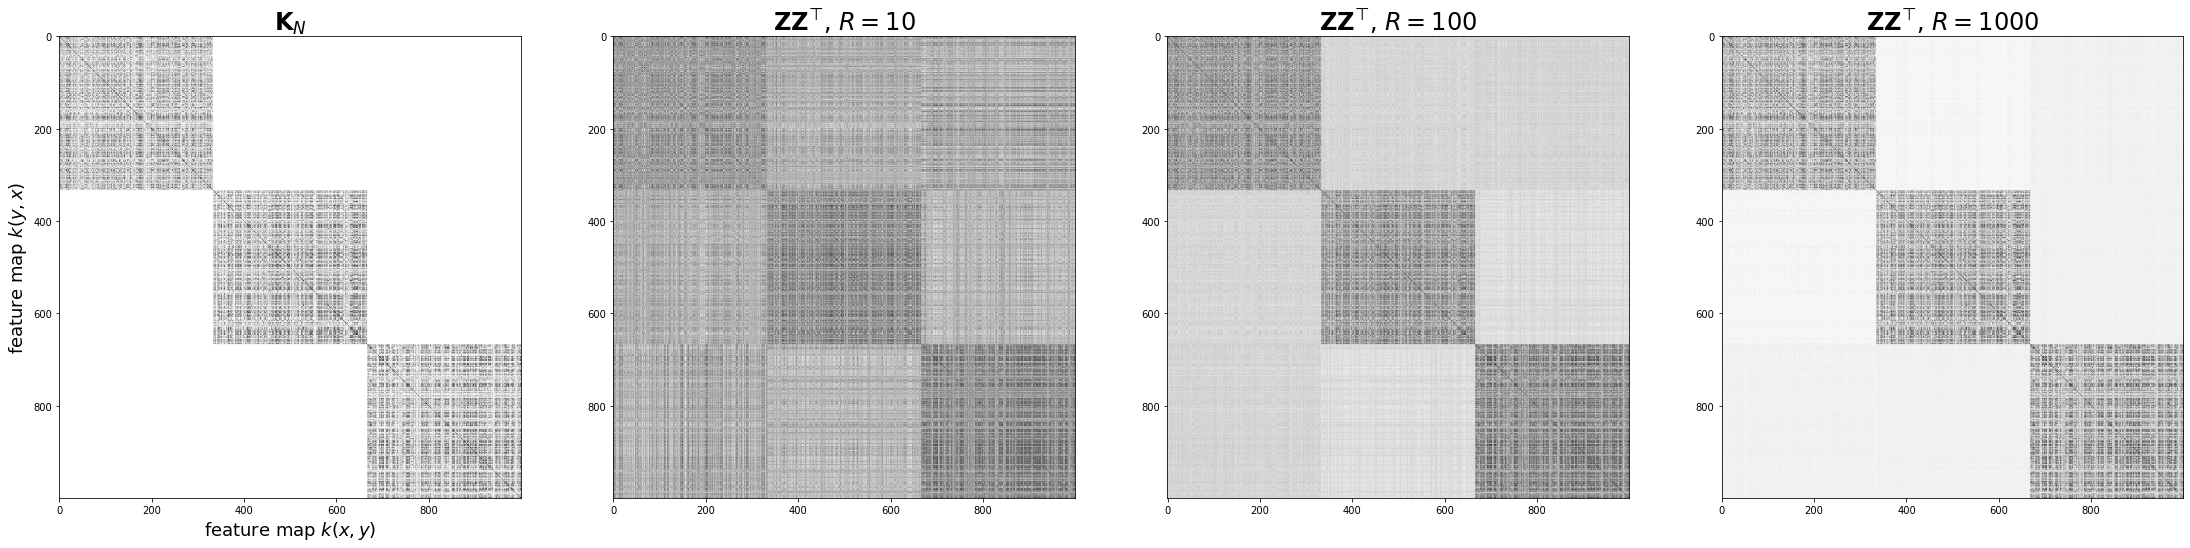

In [15]:
plt.figure(figsize=(48,24))

plt.subplot(151)
plt.imshow(K, cmap=plt.cm.Greys)
plt.title(r"$\mathbf{K}_N$", fontsize=24)
plt.xlabel("feature map $k(x,y)$", fontsize=18)
plt.ylabel("feature map $k(y,x)$", fontsize=18)


for idx, key in enumerate([10, 100, 1000]):
    plt.subplot(152 + idx)
    plt.imshow(approx_feature_space[key], cmap=plt.cm.Greys)
    plt.title(r'$\mathbf{Z} \mathbf{Z}^{\top}$, $R=%s$' % key, fontsize=24)

# save plot for use in thesis
plt.savefig("./outputs/random_feat_kernel_approx_gauss.png", transparent=True, bbox_inches="tight")

plt.show()

#### Comparing the Matrices w.r.t. to Frobenius Norm 

In [16]:
distances = {}

# compute distance as Frobenius norm 
for key, value in approx_feature_space.items():
    distances[key] = np.linalg.norm(K - value)

In [17]:
# check distances between feature matrix and approximation
distances

ticks_x = distances.keys()
ticks_y = distances.values()

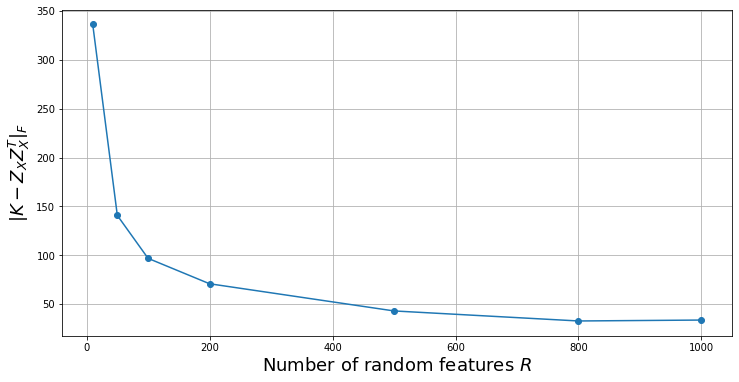

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(ticks_x, ticks_y, "o-")

# plt.title("Approximation Error w.r.t. Frobenius Norm", fontsize=24)
plt.xlabel("Number of random features $R$", fontsize=18)
plt.ylabel(r"$\|K - Z_X Z_X^T \|_F$", fontsize=18)
plt.grid()

# save plot for use in thesis
plt.savefig("./outputs/random_feat_kernel_approx_error_gauss.png", transparent=True, bbox_inches="tight")

plt.show()